In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv("flight_fare.csv")
df

,Unnamed: 0,Flight name,Departure_time,Arrival_time,Price,Source,Destination,Duration,No of stop,Date
0,0,IndiGo,20:05,00:50,2191,Bengaluru,Delhi,4h 45m,1,2022-03-28
1,1,IndiGo,23:05,04:15,2356,Bengaluru,Delhi,5h 10m,1,2022-03-28
2,2,IndiGo,17:10,22:45,2356,Bengaluru,Delhi,5h 35m,1,2022-03-28
3,3,IndiGo,20:15,02:10,2356,Bengaluru,Delhi,5h 55m,1,2022-03-28
4,4,IndiGo,11:20,18:30,2356,Bengaluru,Delhi,7h 10m,1,2022-03-28
...,...,...,...,...,...,...,...,...,...,...
9302,9302,Vistara,10:25,22:55,7451,Kolkata,Hyderabad,12h 30m,2,2022-04-07
9303,9303,Vistara,10:25,22:55,7851,Kolkata,Hyderabad,12h 30m,2,2022-04-07
9304,9304,Air India,10:25,17:35,8614,Kolkata,Hyderabad,31h 10m,3,2022-04-07
9305,9305,Air India,06:55,17:35,8614,Kolkata,Hyderabad,34h 40m,3,2022-04-07


In [3]:
df.shape

(9307, 10)

There are 9307 rows and 10 columns

In [4]:
df.isnull().sum()

Unnamed: 0        0
Flight name       0
Departure_time    0
Arrival_time      0
Price             0
Source            0
Destination       0
Duration          0
No of stop        0
Date              0
dtype: int64

There is no null values present


In [5]:
df.columns

Index(['Unnamed: 0', 'Flight name', 'Departure_time', 'Arrival_time', 'Price',
       'Source', 'Destination', 'Duration', 'No of stop', 'Date'],
      dtype='object')

In [6]:
#checking datatype of object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9307 entries, 0 to 9306
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      9307 non-null   int64 
 1   Flight name     9307 non-null   object
 2   Departure_time  9307 non-null   object
 3   Arrival_time    9307 non-null   object
 4   Price           9307 non-null   int64 
 5   Source          9307 non-null   object
 6   Destination     9307 non-null   object
 7   Duration        9307 non-null   object
 8   No of stop      9307 non-null   object
 9   Date            9307 non-null   object
dtypes: int64(2), object(8)
memory usage: 727.2+ KB


In [7]:
#checking basic info 
df.describe()

,Unnamed: 0,Price
count,9307.000000,9307.000000
mean,4653.000000,5067.254002
std,2686.843811,1901.237665
min,0.000000,925.000000
25%,2326.500000,3811.000000
50%,4653.000000,4969.000000
75%,6979.500000,6241.000000
max,9306.000000,17918.000000


In [8]:
#checking unique in dataset
df.nunique().sort_values()

Source               2
Destination          4
Flight name          6
No of stop           6
Date                10
Departure_time     191
Arrival_time       232
Duration           377
Price              733
Unnamed: 0        9307
dtype: int64

<AxesSubplot:>

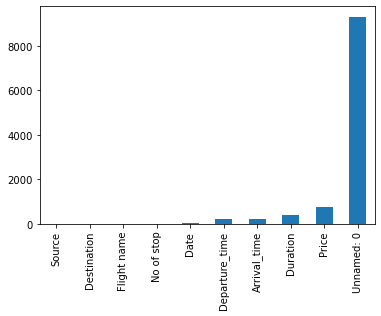

In [9]:
#checking unique in dataset
df.nunique().sort_values().plot.bar()

# EDA

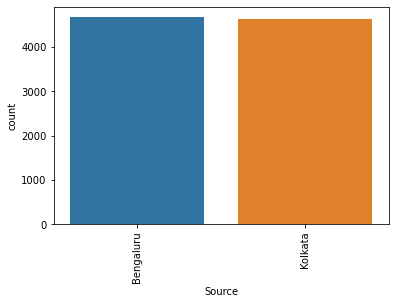

In [10]:
sn.countplot(df["Source"],data=df)
plt.xticks(rotation=90)
plt.show()

for both the location the flight ratio is same

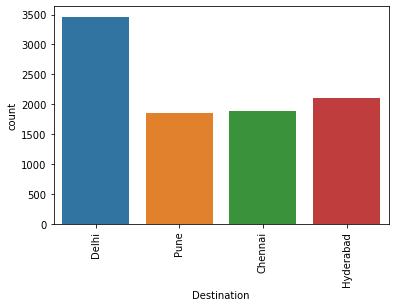

In [11]:
sn.countplot(df["Destination"],data=df)
plt.xticks(rotation=90)
plt.show()

we see that for delhi destination we have more flight as compare to other places

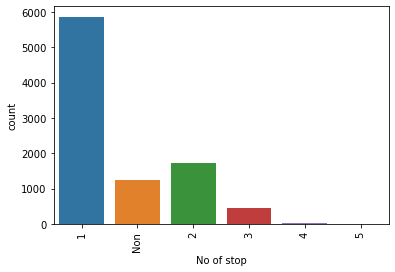

In [12]:
sn.countplot(df["No of stop"],data=df)
plt.xticks(rotation=90)
plt.show()

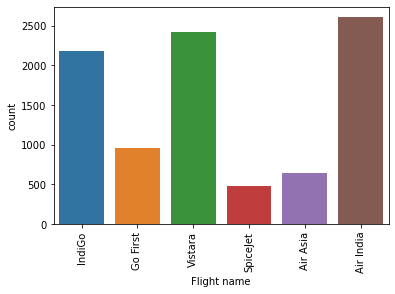

In [13]:
sn.countplot(df["Flight name"],data=df)
plt.xticks(rotation=90)
plt.show()

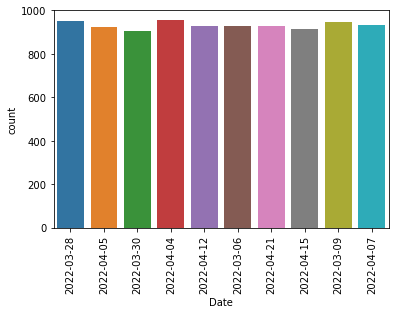

In [14]:
sn.countplot(df["Date"],data=df)
plt.xticks(rotation=90)
plt.show()

for all the dates the flight are equal

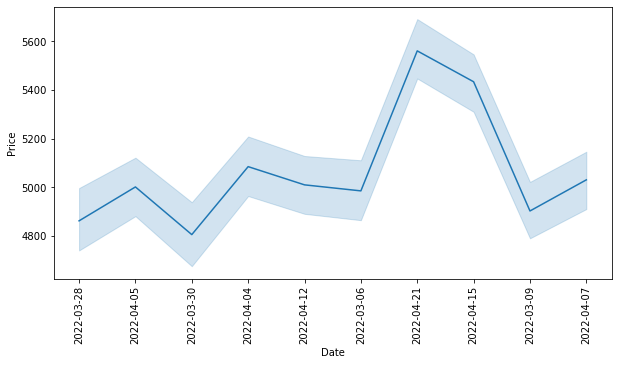

In [15]:
plt.figure(figsize=(10,5))
sn.lineplot(df["Date"],df["Price"])
plt.xticks(rotation=90)
plt.show()

we can see that last minute flight are expensive or the flight whuch is near some festive occasion are expensive

<AxesSubplot:xlabel='Price', ylabel='Density'>

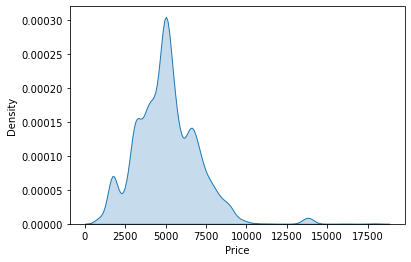

In [16]:
sn.kdeplot(df["Price"],data=df,fill=True)

price is slightly right skewed

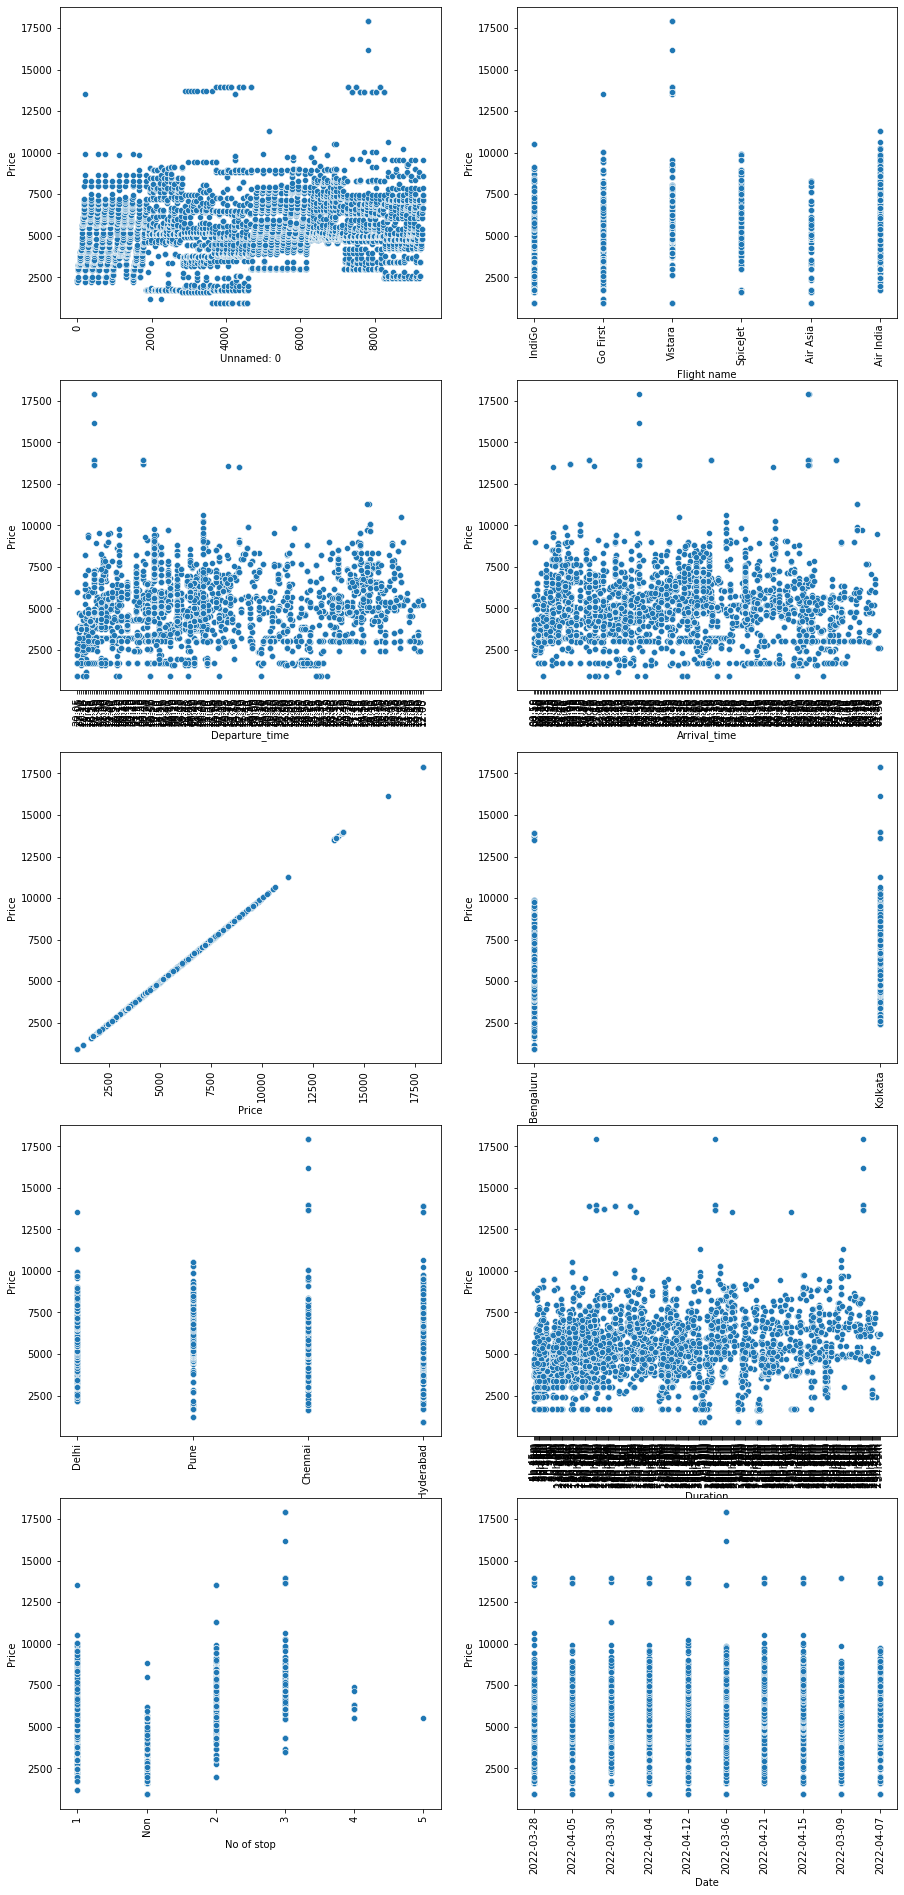

In [17]:
#bivariate analysis
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 12:
        ax = plt.subplot(6,2,plotnumber)
        sn.scatterplot(df[i],df["Price"])
        plt.xticks(rotation=90)
    plotnumber+=1
plt.show()

air india have maximun travel price as compare to other flights

3 stop flight hsvr high fare as compare to other stops

flight to pune have maximum fare may be it is travelling by diferent route and haulting a bit in between

early morning flight are expensive as compare to afternoon flight

In [18]:
#splitting date into date and month 
df["Date"]= pd.to_datetime(df["Date"])
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month

In [19]:
#splitting daparture time and arrival time
df["Departure_time"] = pd.to_datetime(df["Departure_time"])

df["dep_hour"] = df["Departure_time"].dt.hour

df["dep_min"] = df["Departure_time"].dt.minute

In [20]:
df["Arrival_time"] = pd.to_datetime(df["Arrival_time"])
df['Arr_hour'] = df["Arrival_time"].dt.hour
df['Arr_min'] = df["Arrival_time"].dt.minute

In [21]:
#dropping unwanted columns
df.drop(["Date","Departure_time","Arrival_time","Unnamed: 0"],axis=1,inplace=True)

In [22]:
# splitting duration into and hour and min in seperate column for better understanding
s=pd.to_timedelta(df['Duration'])
df['hours']=s.dt.components['hours']
df['minutes']=s.dt.components['minutes']

In [23]:
df.drop(["Duration"],inplace=True,axis=1)

In [24]:
# replacing non with 0 to make it a discrete column as model will not understan non
df["No of stop"] = df["No of stop"].replace("Non",0)

In [25]:
#chaning datatype of int
df["No of stop"]= df["No of stop"].astype("int64")

In [26]:
#replacing source manually with 1 and 2
df["Source"] = df["Source"].replace("Bengaluru",1)
df["Source"] = df["Source"].replace("Kolkata",2)

In [27]:
#verifying datatype is correct 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9307 entries, 0 to 9306
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Flight name  9307 non-null   object
 1   Price        9307 non-null   int64 
 2   Source       9307 non-null   int64 
 3   Destination  9307 non-null   object
 4   No of stop   9307 non-null   int64 
 5   Day          9307 non-null   int64 
 6   Month        9307 non-null   int64 
 7   dep_hour     9307 non-null   int64 
 8   dep_min      9307 non-null   int64 
 9   Arr_hour     9307 non-null   int64 
 10  Arr_min      9307 non-null   int64 
 11  hours        9307 non-null   int64 
 12  minutes      9307 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 945.4+ KB


# label encoding

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9307 entries, 0 to 9306
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Flight name  9307 non-null   object
 1   Price        9307 non-null   int64 
 2   Source       9307 non-null   int64 
 3   Destination  9307 non-null   object
 4   No of stop   9307 non-null   int64 
 5   Day          9307 non-null   int64 
 6   Month        9307 non-null   int64 
 7   dep_hour     9307 non-null   int64 
 8   dep_min      9307 non-null   int64 
 9   Arr_hour     9307 non-null   int64 
 10  Arr_min      9307 non-null   int64 
 11  hours        9307 non-null   int64 
 12  minutes      9307 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 945.4+ KB


In [29]:
en=["Flight name","Destination"]

In [30]:
# for converting categorical to numericalcolumn as machine learing understands numerical value not text
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in df[en]:
    df[i]=label.fit_transform(df[i])
    
df

,Flight name,Price,Source,Destination,No of stop,Day,Month,dep_hour,dep_min,Arr_hour,Arr_min,hours,minutes
0,3,2191,1,1,1,28,3,20,5,0,50,4,45
1,3,2356,1,1,1,28,3,23,5,4,15,5,10
2,3,2356,1,1,1,28,3,17,10,22,45,5,35
3,3,2356,1,1,1,28,3,20,15,2,10,5,55
4,3,2356,1,1,1,28,3,11,20,18,30,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,5,7451,2,2,2,7,4,10,25,22,55,12,30
9303,5,7851,2,2,2,7,4,10,25,22,55,12,30
9304,1,8614,2,2,3,7,4,10,25,17,35,7,10
9305,1,8614,2,2,3,7,4,6,55,17,35,10,40


In [31]:
from sklearn.preprocessing import PowerTransformer

In [32]:
pt = PowerTransformer()
df[["Arr_hour","Day"]]= pt.fit_transform(df[["Arr_hour","Day"]])

<function matplotlib.pyplot.show(close=None, block=None)>

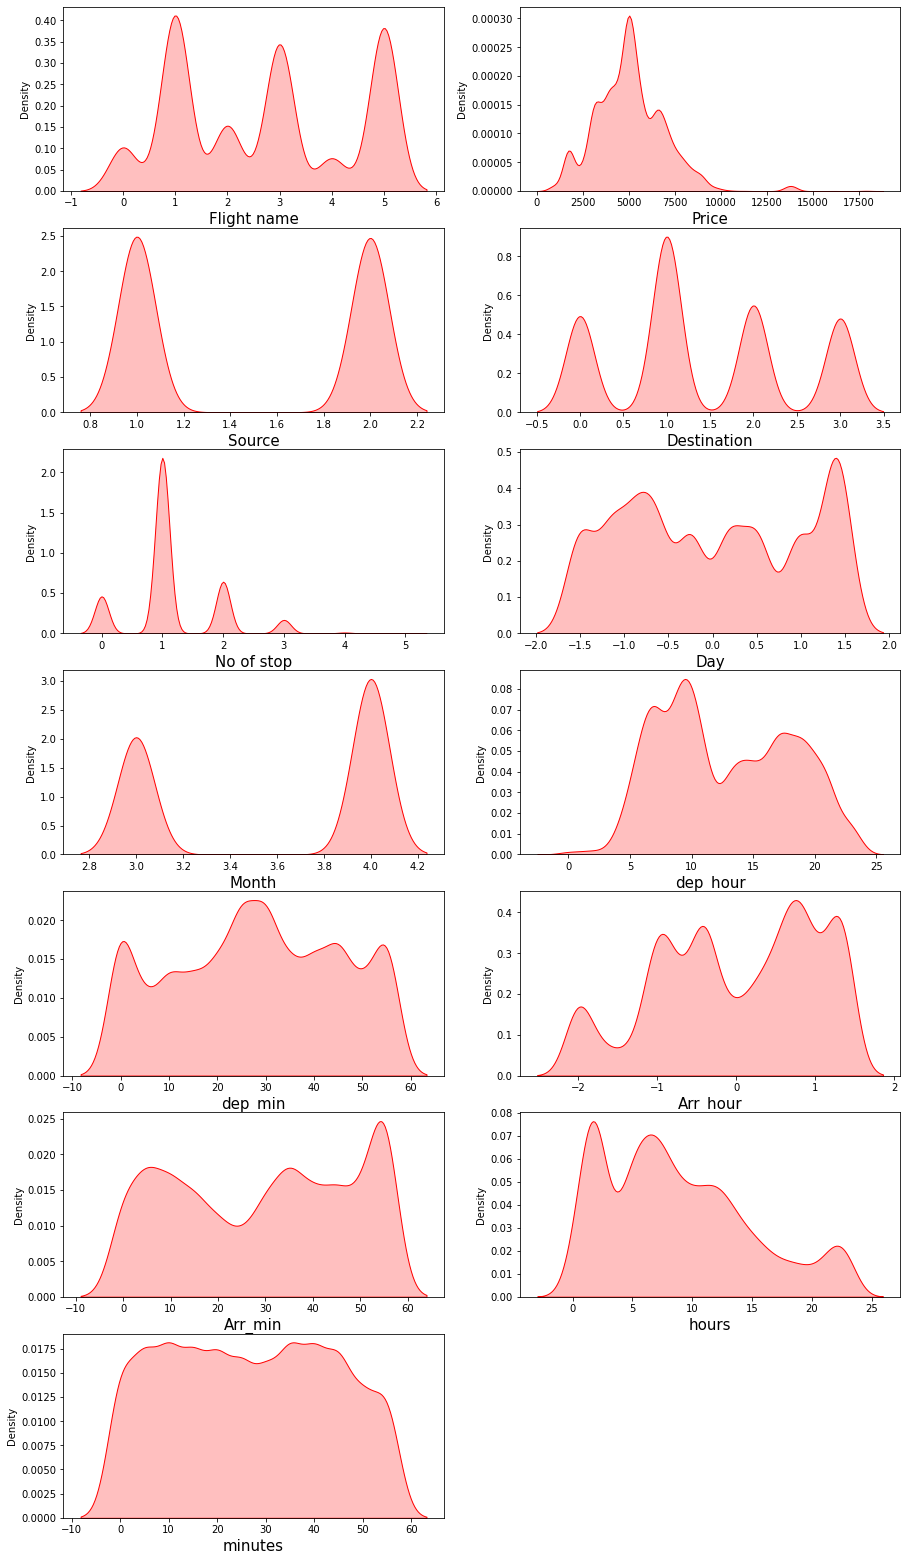

In [33]:
#univariate analysis
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 20:
        ax=plt.subplot(10,2,plotnumber)
        sn.kdeplot(df[i],data=df,fill=True,color="r")
        plt.xlabel(i,fontsize=15)
        plotnumber+=1
plt.show

all column is norammlly distributed except price which is target column

In [34]:
df.skew()

Flight name    0.105787
Price          0.887675
Source         0.007522
Destination    0.203666
No of stop     0.751486
Day            0.059824
Month         -0.406395
dep_hour       0.173971
dep_min       -0.076157
Arr_hour      -0.352612
Arr_min       -0.111046
hours          0.625871
minutes        0.043015
dtype: float64

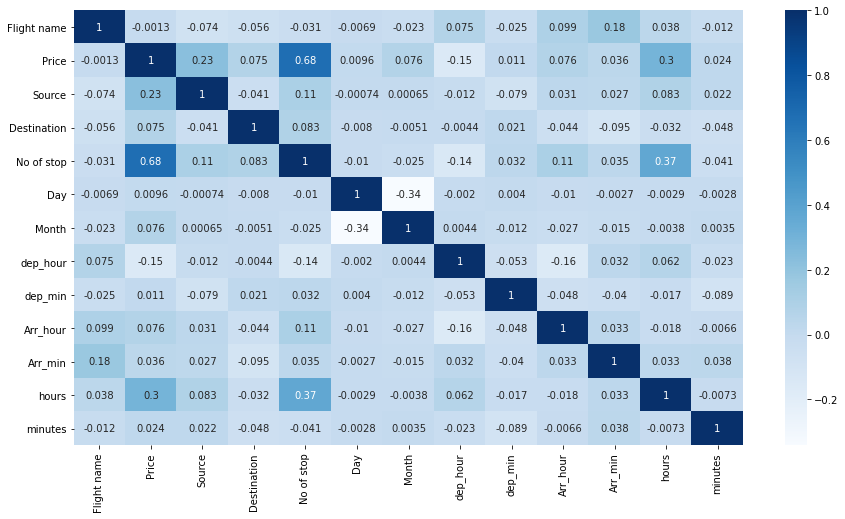

In [35]:
#multivariate analysis
plt.figure(figsize = (15,8))
sn.heatmap(df.corr(),annot = True,cmap = "Blues")
plt.show()

month and day is showing good correlation

# Dividing data into X and Y

In [36]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [37]:
x.shape

(9307, 12)

In [38]:
y.shape

(9307,)

# scaling X values

In [39]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [40]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [41]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,9307.000000,9307.000000,9307.000000,9307.000000,9307.000000,9307.000000,9307.000000,9307.000000,9307.000000,9307.000000,9307.000000,9307.000000
mean,0.539981,0.498120,0.473156,0.231654,0.509877,0.599549,0.553847,0.510437,0.596892,0.538773,0.382545,0.483829
std,0.337834,0.500023,0.341164,0.143486,0.339164,0.490016,0.228726,0.311912,0.293040,0.338601,0.266525,0.306472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.000000,0.333333,0.200000,0.214306,0.000000,0.347826,0.272727,0.352746,0.181818,0.173913,0.181818
50%,0.600000,0.000000,0.333333,0.200000,0.425552,1.000000,0.521739,0.545455,0.620943,0.545455,0.347826,0.454545
75%,1.000000,1.000000,0.666667,0.200000,0.840041,1.000000,0.739130,0.818182,0.855480,0.818182,0.565217,0.727273
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Spliting Train and Test data

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [44]:
x_train.shape

(6794, 12)

In [45]:
x_test.shape

(2513, 12)

In [46]:
y_train.shape

(6794,)

In [47]:
y_test.shape

(2513,)

# Model building

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# LinearRegression

In [49]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.5040424278414657


In [50]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 1707541.4077250261
MAE: 937.4750032098758
r2_score: 0.048507885322431665


# RandomForestRegressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9881263141754206


In [52]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 208404.40096226978
MAE: 197.12609991378167
r2_score: 0.9353936636522835


# DecisionTreeRegressor

In [53]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9952267177798488


In [54]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 308962.1592828403
MAE: 174.18145642658178
r2_score: 0.908380803433025


# GradientBoostingRegressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.7897249105040695


In [56]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 750318.7340662556
MAE: 625.0382581498238
r2_score: 0.6841461274485932


# cross validation

In [57]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 1891010.236175, 424451.832069
RF    : 626078.944496, 315471.440180
DTR    : 957019.402525, 427729.219200
GBR    : 996345.077582, 307950.852593


According to all metrics score selecting the RandomForestRegressor for GridSeachCV

# HYPER PARAMETER TUNING

# RandomForestRegressor

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
RF=RandomForestRegressor()
param={
     'criterion':['mse','mae'],
    'n_estimators':[100, 200],
    'max_depth':[1],
   'max_features' : ["sqrt", "log2",],
}

In [60]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [61]:
RF_grid.fit(x_train,y_train)
RF_grid_pred=RF_grid.best_estimator_.predict(x_test)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


In [62]:
RF_grid.best_params_

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [63]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 208404.40096226978
MAE: 197.12609991378167
r2_score: 0.9353936636522835


<AxesSubplot:xlabel='Price', ylabel='Density'>

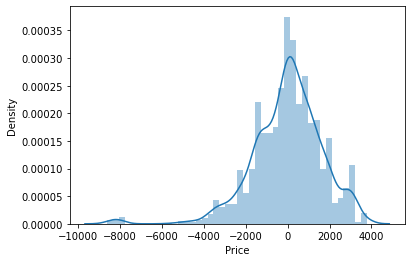

In [64]:
sn.distplot(RF_grid_pred-y_test)

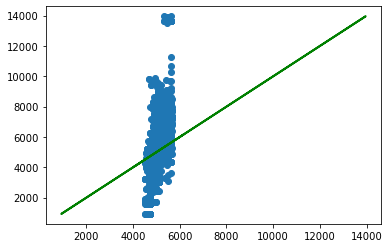

In [65]:
plt.scatter(RF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='green')

# Saving the model

In [66]:
import joblib

In [67]:
joblib.dump(RF_grid.best_estimator_,'Flight_Price_Pediction_Model building.obj')

['Flight_Price_Pediction_Model building.obj']